In [0]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

import imutils

debug = False

def url_to_image(url):
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

def get_contours(url, sp, sr, threshold_start, threshold_end, ks, distance):
  url2 = url

  img = url_to_image(url2)
  print("Original")
  cv2_imshow(img)

  # filter image
#   sp = 10 #The spatial window radius.
#   sr = 25 #The color window radius.
  shifted = cv2.pyrMeanShiftFiltering(img, sp, sr)
  if debug == True:
    print("After filtering")
    cv2_imshow(shifted)

  # convert to gray
  gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, threshold_start, threshold_end,
    cv2.THRESH_BINARY)[1]

  # apply dilate
#   kernel_size = (1,3)
  kernel = np.ones(ks, np.uint8) 
  thresh = cv2.dilate(thresh, kernel, iterations=1)

  if debug == True:
    print("After dilate")
    cv2_imshow(thresh)

#   import imutils
#   # find contours in the thresholded image
#   cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#   cnts = imutils.grab_contours(cnts)

#   image = img.copy()

#   # loop over the contours
#   for (i, c) in enumerate(cnts):
#     # draw the contour
#     ((x, y), _) = cv2.minEnclosingCircle(c)
#   # 	cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
#   # 		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
#     cv2.drawContours(image, [c], -1, (0, 255, 0), 2)


#   if debug == True:
#     print("After finding contours")
#     cv2_imshow(image)
#     print("[INFO] {} unique contours found".format(len(cnts)))

  from skimage.feature import peak_local_max
  from skimage.morphology import watershed
  from scipy import ndimage

  D = ndimage.distance_transform_edt(thresh)
  if debug == True:
    plt.imshow(D)

  localMax = peak_local_max(D, indices=False, min_distance=distance,
    labels=thresh)

  # perform a connected component analysis on the local peaks,
  # using 8-connectivity, then appy the Watershed algorithm
  markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
  labels = watershed(-D, markers, mask=thresh)
  if debug == True:
    print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

  # loop over the unique labels returned by the Watershed
  # algorithm
  image = img
  for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
      continue

    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255 
    #cv2_imshow(mask)#[labels == label] = 255   
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
      cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)

  # show the output image
  cv2_imshow(image)
  print("Number of objects = ", np.unique(labels).shape[0])  

Original


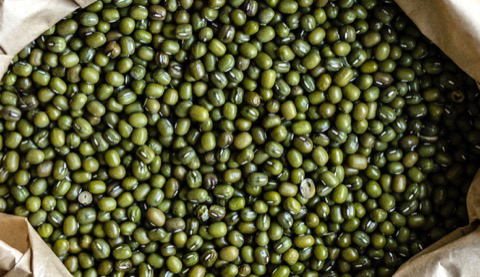

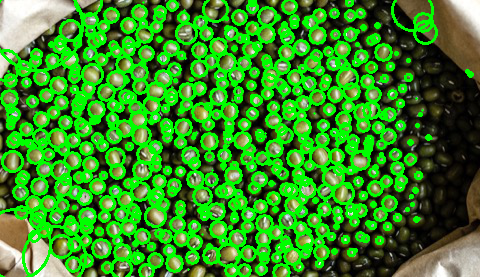

Number of objects =  604


In [50]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count1.jpg"
get_contours(url2, sp=4, sr=80, threshold_start = 80, threshold_end = 255, ks=(1,1), distance=2)

Original


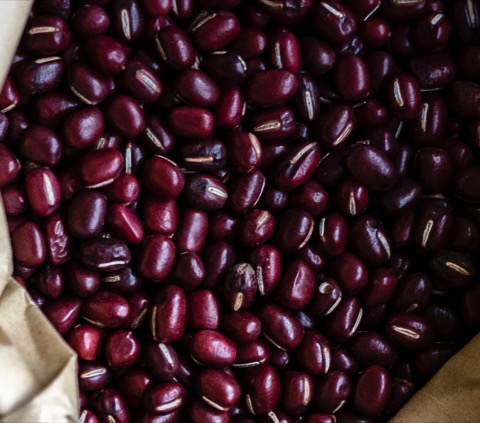

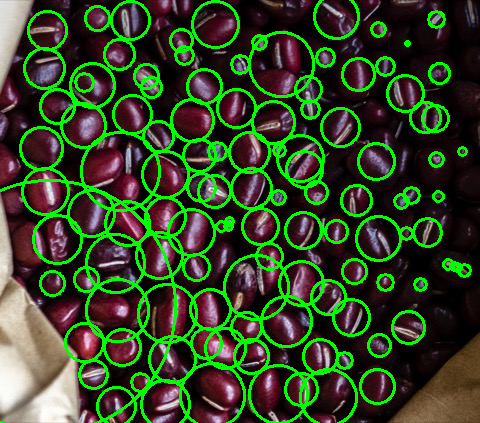

Number of objects =  116


In [51]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count2.jpg"
get_contours(url2, sp=10, sr=40, threshold_start = 22, threshold_end = 255, ks=(3,3), distance=17)

Original


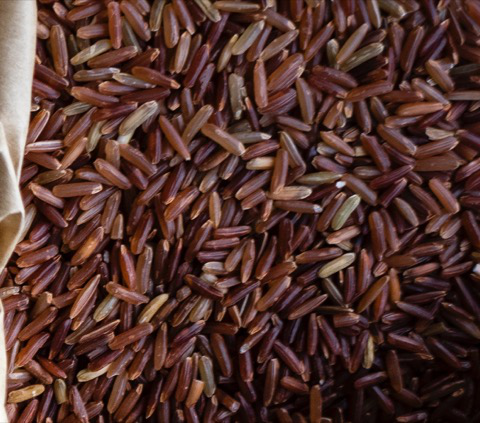

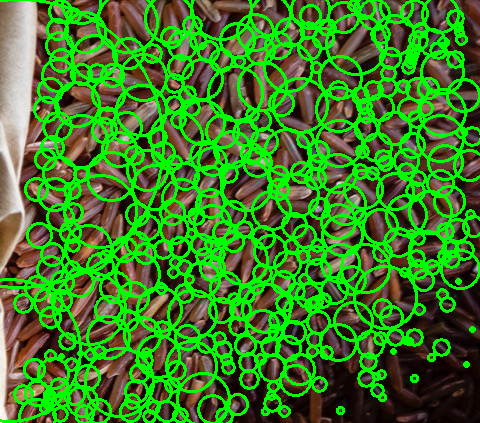

Number of objects =  395


In [52]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count3.jpg"
get_contours(url2, sp=10, sr=25, threshold_start = 60, threshold_end = 200, ks=(2,6), distance=7)

Original


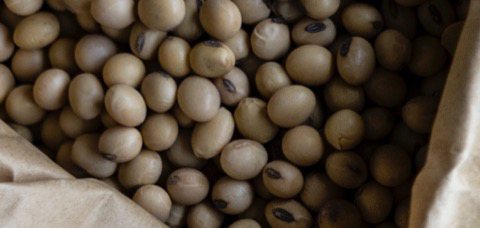

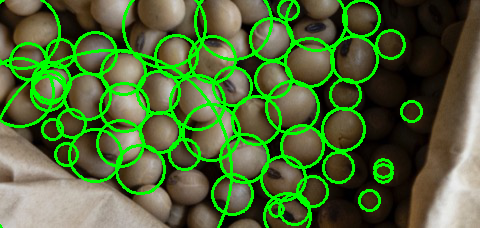

Number of objects =  54


In [53]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count4.jpg"
get_contours(url2, sp=10, sr=30, threshold_start = 30, threshold_end = 255, ks=(2,2), distance=7)

Original


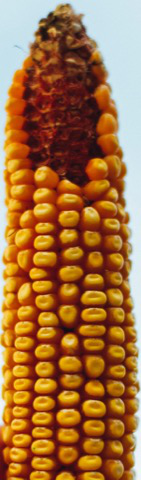

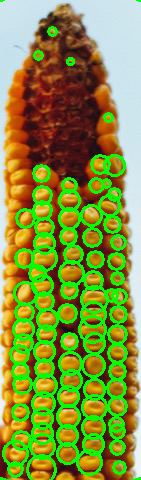

Number of objects =  89


In [54]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count5.jpg"
get_contours(url2, sp=10, sr=50, threshold_start = 110, threshold_end = 155, ks=(2,2), distance=7)


Original


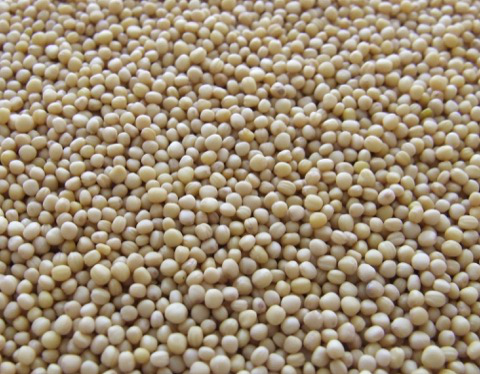

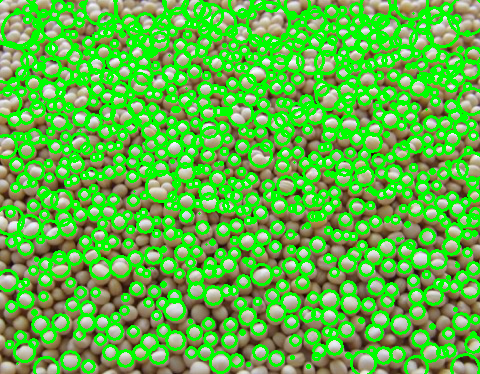

Number of objects =  844


In [55]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count6.jpg"
get_contours(url2, sp=10, sr=60, threshold_start = 150, threshold_end = 255, ks=(1,1), distance=3)

Original


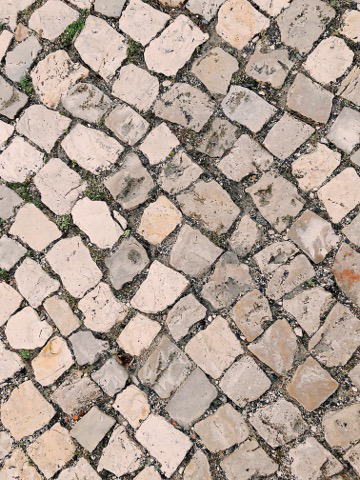

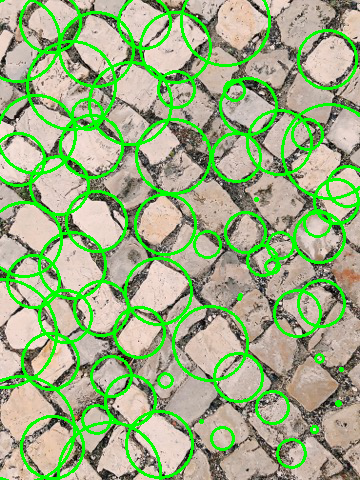

Number of objects =  67


In [56]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count7.jpg"
get_contours(url2, sp=10, sr=30, threshold_start = 190, threshold_end = 210, ks=(3,3), distance=15)


Original


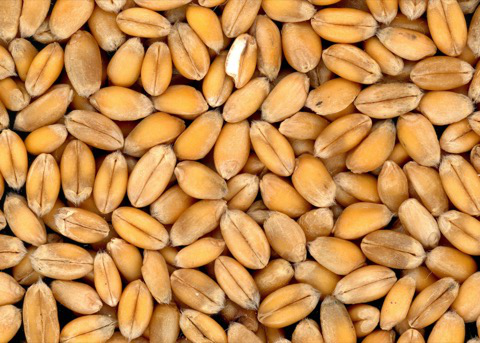

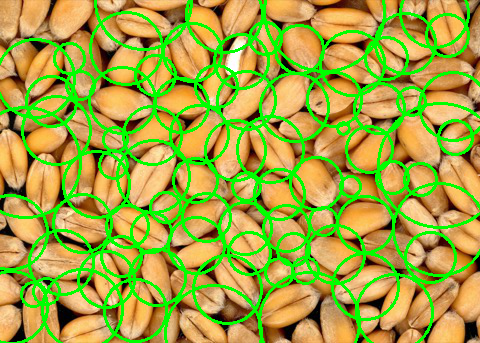

Number of objects =  81


In [57]:
debug = False
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count8.jpg"

img = url_to_image(url2)
print("Original")
cv2_imshow(img)

# filter image
sp = 10 #The spatial window radius.
sr = 70 #The color window radius.
shifted = cv2.pyrMeanShiftFiltering(img, sp, sr)
if debug == True:
  print("After filtering")
  cv2_imshow(shifted)
  
# shifted = image

# convert to gray
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 170, 205,
	cv2.THRESH_BINARY)[1]

# apply dilate
kernel_size = (2, 4)
kernel = np.ones(kernel_size, np.uint8) 
thresh = cv2.dilate(thresh, kernel, iterations=1)

if debug == True:
  print("After dilate")
  cv2_imshow(thresh)

import imutils
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

image = img.copy()

# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
# 	cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
# 		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2) 

if debug == True:
  print("After finding contours")
  cv2_imshow(image)
  print("[INFO] {} unique contours found".format(len(cnts)))
  
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

D = ndimage.distance_transform_edt(thresh)
if debug == True:
#   print("Euclidean distance transform")
  plt.imshow(D)

  
min_distance = 15 
  
localMax = peak_local_max(D, indices=False, min_distance=min_distance,
	labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
if debug == True:
  print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

if debug == True:
  cv2_imshow(labeled_img)

# loop over the unique labels returned by the Watershed
# algorithm
image = img
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
 
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255 
	#cv2_imshow(mask)#[labels == label] = 255   
  # detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
 
# show the output image
cv2_imshow(image)
print("Number of objects = ", np.unique(labels).shape[0])

Original


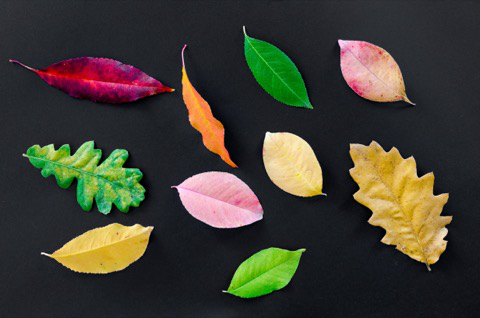

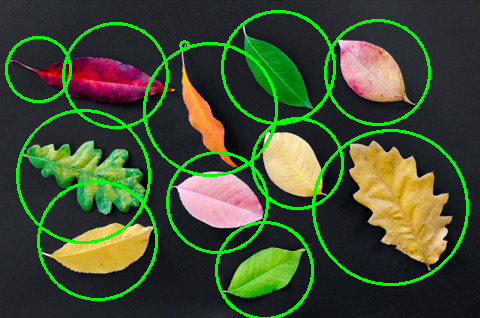

Number of objects =  13


In [59]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count10.jpg"
get_contours(url2, sp=20, sr=20, threshold_start = 50, threshold_end = 255, ks=(4,4), distance=20)

Original


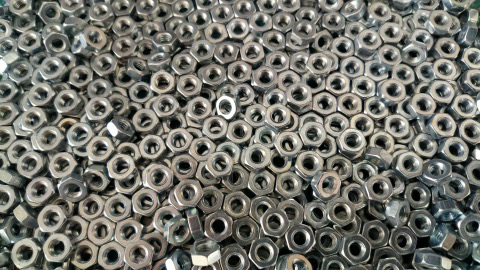

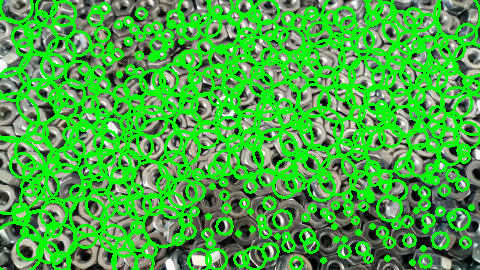

Number of objects =  427


In [61]:
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count12.jpg"
get_contours(url2, sp=30, sr=40, threshold_start = 155, threshold_end = 255, ks=(4,4), distance=7)